In [1]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from timeit import default_timer as timer
# needed to see images
from IPython.display import display, Image
import pickle
from sklearn.preprocessing import LabelBinarizer

# needed for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
current_palette = sns.color_palette()

In [2]:
def getkey(item):
    fpr, tpr, _ = roc_curve(test_labels.ravel(), test_preds[item])
    roc_auc = auc(fpr, tpr)
    return roc_auc

def plotROC(testlabels, test_preds):
    classifiers = list(test_preds.keys())

    # Plot all ROC curves
    plt.figure(figsize=(15,9))
    for i, clf in zip(range(len(classifiers)), sorted(classifiers, key=getkey, reverse=True)):
        fpr, tpr, _ = roc_curve(testlabels.ravel(), test_preds[clf] )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
                 label='ROC curve '+ clf +  ' (area = {0:0.4f})'
                       ''.format(roc_auc), linestyle='-', linewidth=2)


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of multiclass ROC curves')
    plt.legend(loc="lower right", fontsize=14)
    plt.show()

In [3]:
dataset_acc = pickle.load(open('dataset_acc.p','rb'))
cnn = []
rnn = []
dnn = []
for s in dataset_acc:
    print(s)
    cnn.append((s, dataset_acc[s]['CNN']))
    rnn.append((s, dataset_acc[s]['RNN']))
    dnn.append((s, dataset_acc[s]['DeepNN']))

const_MFCC
features193
flat0pad
const_LogMFCC


In [6]:
np.array(cnn)[:,1]

array(['58.2474226804', '63.45933562428408', '0.0', '39.34707903780069'], 
      dtype='<U17')

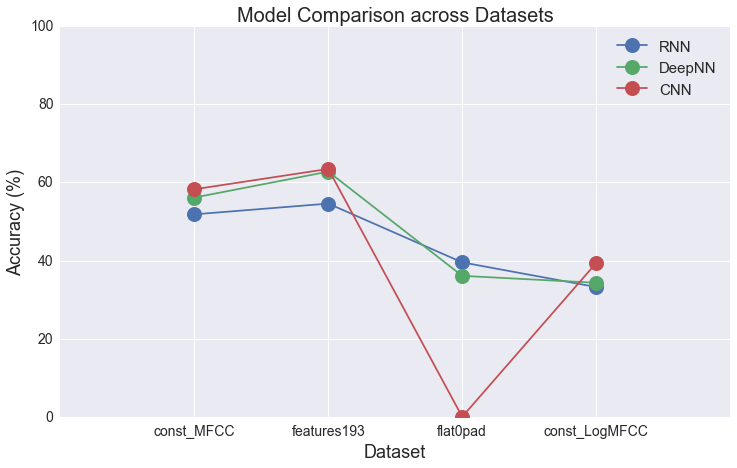

In [31]:
fig = plt.figure(figsize=[12,7])
plt.title('Model Comparison across Datasets', fontsize=20)
plt.plot(np.array(rnn)[:,1], 'o-', markersize=15, label='RNN')
plt.plot(np.array(dnn)[:,1], 'o-', markersize=15, label='DeepNN')
plt.plot(np.array(cnn)[:,1], 'o-', markersize=15, label='CNN')
plt.xlabel('Dataset', fontsize=18)
plt.xticks(range(4), np.array(cnn)[:,0], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=18)
plt.ylim([0, 100])
plt.xlim([-1, 4])
plt.legend(loc="upper right", fontsize=15)
plt.show()

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

def runNN(data, truth): 
    nnet = OneVsRestClassifier(MLPClassifier(max_iter=5000, shuffle=True, hidden_layer_sizes=(500, 600)))
    nnetmodel = nnet.fit(data, truth)
    return nnetmodel

In [46]:
data = pickle.load(open('193_features.p', 'rb'))
s = list(data['sample'])
s = pd.DataFrame(s)
data_cols = s.columns
s['label'] = data['label']
print('working dataframe\'s shape:', s.shape)
test_preds = {}
train = s[0:6984]
test = s[6984:]
LB = LabelBinarizer().fit(train['label'])
test_labels = LB.transform(test['label'])
del data, s

working dataframe's shape: (8730, 194)


In [47]:
nn = runNN(train[data_cols], LB.transform(train['label']))

In [48]:
print('done!')

done!


In [49]:
nn.score(test[data_cols], test_labels)

0.19358533791523483